<a href="https://colab.research.google.com/github/VIJAYARAGUL362/HANDLING-OUTLIERS-USING-IQR-STATISTICS/blob/main/HANDLING_OUTLIERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

CREATING A DATASET

In [ ]:
data = {
    'Name':["VIKCTOR","STANLEY","KING","ALEX","ROB","TOM","KALI"],
    'Height':[1.2,4.3,5.5,7.2,5.9,6.6,122.5],
    'weight':[30,50,60,75,53,62,50]
}

import pandas as pd
dataset = pd.DataFrame(data)

dataset

,Name,Height,weight
0,VIKCTOR,1.2,30
1,STANLEY,4.3,50
2,KING,5.5,60
3,ALEX,7.2,75
4,ROB,5.9,53
5,TOM,6.6,62
6,KALI,122.5,50


**CHECKING FOR OUTLIERS**

1.HISTOGRAM

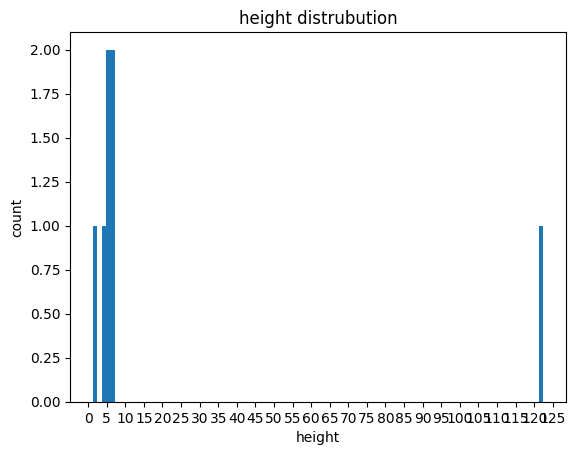

In [ ]:
plt.hist(dataset['Height'],bins=100)  # PLOTTING THE HISTOGRAM
plt.title("height distrubution")
# plt.xticks(np.arange(0,122,5))
ax = plt.gca()                         # GETTING THE AXIS INFO
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # CHOSSING  X AXIS AND SELECTING THE TICK SHOULD BE 5
plt.xlabel('height')
plt.ylabel('count')
plt.show()

BOXPLOT

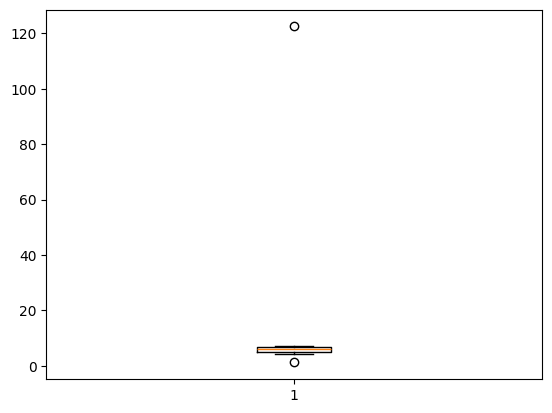

In [ ]:
plt.boxplot(dataset['Height']) #PLOTTING THE BOXPLOT
plt.show()

CALCULATING THE PERCENTILES

In [ ]:
percent_50 = dataset['Height'].quantile(0.5)
print(percent_50)
percent_25 = dataset['Height'].quantile(0.25)
print(percent_25)
percent_75 = dataset['Height'].quantile(0.75)
print(percent_75)
dataset



5.9
4.9
6.9


,Name,Height,weight
0,VIKCTOR,1.2,30
1,STANLEY,4.3,50
2,KING,5.5,60
3,ALEX,7.2,75
4,ROB,5.9,53
5,TOM,6.6,62
6,KALI,122.5,50


CALCULATING IQR

In [ ]:
IQR  = percent_75 - percent_25
print(IQR)

2.0


IQR STASTICAL METHOD

In [ ]:
lower_bound = percent_25-1.5*IQR
upper_bound = percent_75+1.5*IQR
print(lower_bound.round())
print(upper_bound.round())


2.0
10.0


FINDING THE OUTLIER

In [ ]:
outliers_height = dataset[(dataset['Height'] < lower_bound) | (dataset['Height'] > upper_bound)]
outlier_indices_height = outliers_height.index

print("Height Outliers:\n", outliers_height)
print("Height Outlier Indices:\n", outlier_indices_height)

Height Outliers:
       Name  Height  weight
0  VIKCTOR     1.2      30
6     KALI   122.5      50
Height Outlier Indices:
 Index([0, 6], dtype='int64')


REMOVING THE OUTLIER FROM THE DATASET

In [ ]:
dataset.drop(dataset[(dataset['Height'] < lower_bound) | (dataset['Height'] > upper_bound)].index, inplace=True)
dataset

,Name,Height,weight
1,STANLEY,4.3,50
2,KING,5.5,60
3,ALEX,7.2,75
4,ROB,5.9,53
5,TOM,6.6,62
